In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import json
import glob
import numpy as np
from collections import defaultdict, namedtuple
from pprint import pprint
from copy import copy

In [9]:
import path_guiding_kdtree_loader
from path_guiding_kdtree_loader import read_records, convert_data, load_sample_file

In [4]:
from path_guiding import VMFFitIncremental8, VMFMixture8

In [5]:
from matplotlib import pyplot
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [6]:
%matplotlib notebook

In [7]:
def _shuffle(xs, ws):
    n = xs.shape[0]
    idx = np.random.permutation(n)
    return xs[idx,...], ws[idx]

In [29]:
def plot_vmf_pdf(ax, vmfm, logscale = False):
    # https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/
    phi = np.linspace(0, np.pi, 100)
    theta = np.linspace(0, 2*np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)

    # The Cartesian coordinates of the unit sphere
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)

    pts = np.vstack((x.ravel(),y.ravel(),z.ravel())).T
    fcolors = vmfm.pdf(pts).reshape(x.shape)
    print (fcolors.max())
    if logscale:
        fcolors = np.log(fcolors)
        fcolors = (fcolors-fcolors.min()) / (fcolors.max() - fcolors.min())
    else:
        fcolors /= fcolors.max()
    
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=matplotlib.cm.coolwarm(fcolors), shade=False)
    return fcolors

In [11]:
tree, celldata = path_guiding_kdtree_loader.convert_data(
    path_guiding_kdtree_loader.read_records('/tmp/surface_radiance_records_10.json'),
    load_samples = False,
    build_boxes = False)

Opening /tmp/surface_radiance_records_10.json


In [23]:
cd = celldata[515]
pos, dir, weight = load_sample_file('/tmp/surface_samples_round_10_cell_515.csv')

In [24]:
pprint (cd)

{'average_weight': 23.766767501831055,
 'box': None,
 'center': array([ 0.04872294,  0.56881407, -0.31542042]),
 'dir': None,
 'fitparam_maximization_step_every': 800,
 'fitparam_prior_alpha': 80.48999786376953,
 'fitparam_prior_nu': 80.48999786376953,
 'fitparam_prior_tau': 80.48999786376953,
 'id': 515,
 'incident_flux_learned': array(9.95101802),
 'incident_flux_sampled': array(6.88801503),
 'mixture_learned': <path_guiding.VMFMixture8 object at 0x7f22e9bd01b8>,
 'mixture_sampled': <path_guiding.VMFMixture8 object at 0x7f22e9bd01f0>,
 'num_points': 8651,
 'proj': None,
 'size': array([0.10824226, 0.05044222, 0.16501182]),
 'stddev': array([0.03106693, 0.01442822, 0.02298709]),
 'val': None}


In [27]:
pprint (cd.mixture_learned.means)

array([[ 0.6817861 ,  0.7231704 ,  0.11041851],
       [-0.9834328 , -0.00842986,  0.1810768 ],
       [-0.14629413, -0.7809748 ,  0.60718733],
       [ 0.48571637,  0.04392555, -0.8730121 ],
       [-0.10088497,  0.42765135,  0.8982965 ],
       [-0.3195498 , -0.7363118 , -0.59643346],
       [-0.1291007 ,  0.92630184, -0.3539744 ],
       [ 0.8623777 , -0.4765922 ,  0.17077608]], dtype=float32)


In [28]:
pprint (cd.mixture_learned.weights)

array([0.01820793, 0.01104986, 0.01041345, 0.01350045, 0.01041345,
       0.03563621, 0.8854571 , 0.01532158], dtype=float32)


In [25]:
len(pos)

8651

<IPython.core.display.Javascript object>


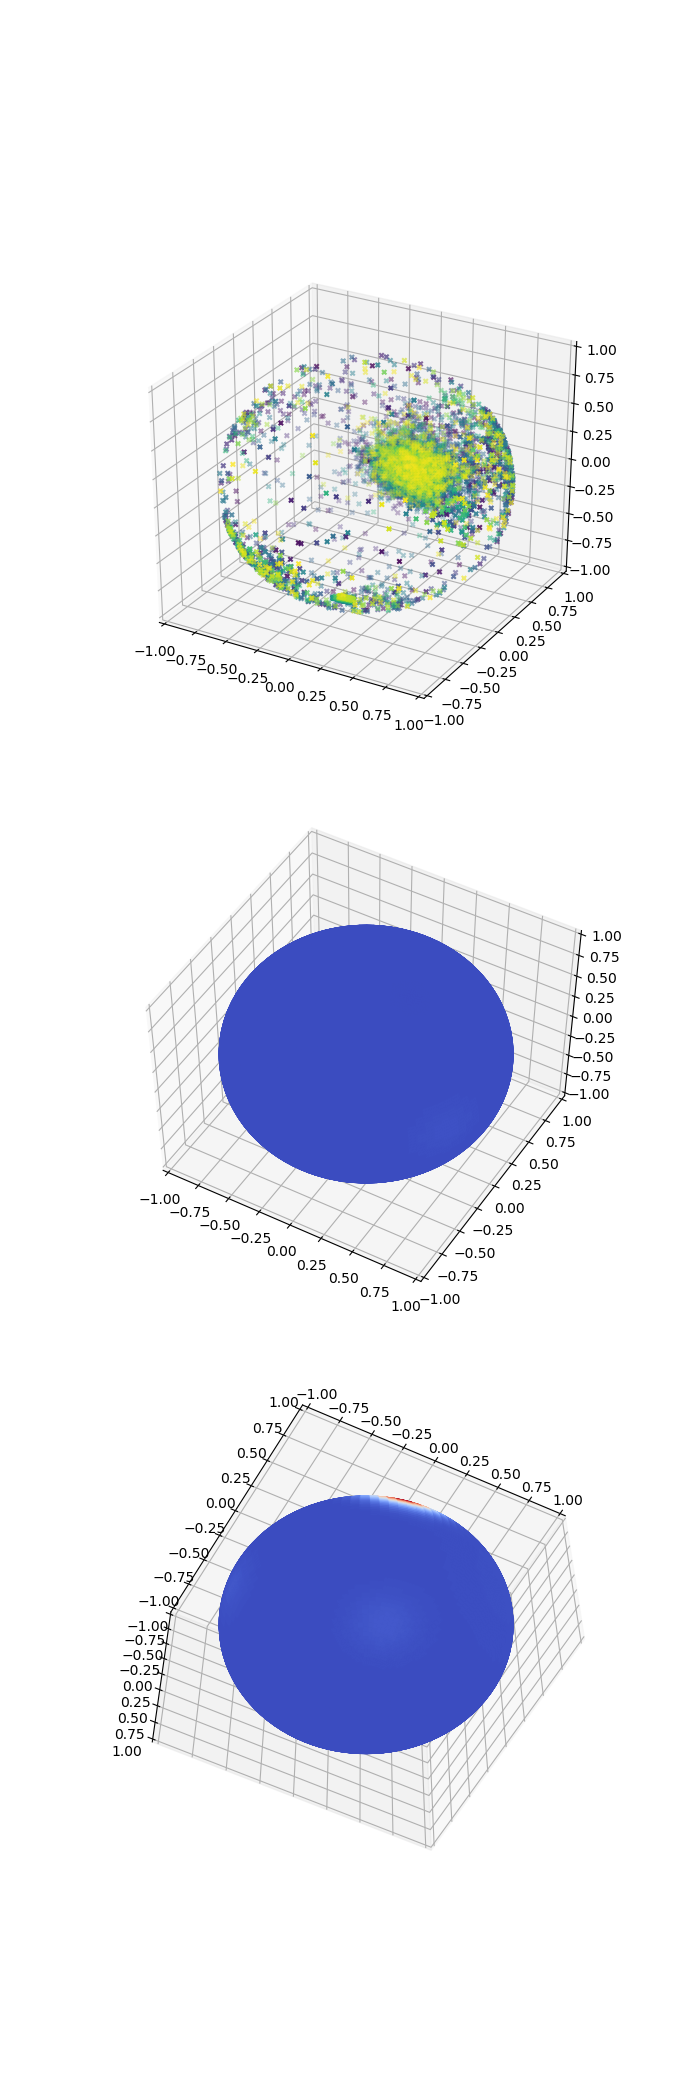

5.634222507476807
4.214471817016602


array([[0.00034859, 0.00032738, 0.00030508, ..., 0.06980413, 0.06238235,
        0.05442292],
       [0.00034859, 0.00033657, 0.00032127, ..., 0.06994081, 0.06244334,
        0.05442292],
       [0.00034859, 0.00034612, 0.00033862, ..., 0.06999345, 0.06246679,
        0.05442292],
       ...,
       [0.00034859, 0.0003101 , 0.00027602, ..., 0.06928371, 0.06214944,
        0.05442292],
       [0.00034859, 0.00031855, 0.00029002, ..., 0.06958454, 0.0622842 ,
        0.05442292],
       [0.00034859, 0.00032738, 0.00030508, ..., 0.06980413, 0.06238235,
        0.05442292]])

In [30]:
fig = pyplot.figure(figsize = (7, 21))
ax = fig.add_subplot(311, projection='3d')
ax.set_xlim(-1.,1.)
ax.set_ylim(-1.,1.)
ax.set_zlim(-1.,1.)
ax.scatter(*dir.T, c=np.linspace(0., 1., pos.shape[0]), marker='x', s= 10.)

ax = fig.add_subplot(312, projection='3d')
ax.set_xlim(-1.,1.)
ax.set_ylim(-1.,1.)
ax.set_zlim(-1.,1.)
plot_vmf_pdf(ax, cd.mixture_learned)

ax = fig.add_subplot(313, projection='3d')
ax.set_xlim(-1.,1.)
ax.set_ylim(-1.,1.)
ax.set_zlim(-1.,1.)
plot_vmf_pdf(ax, cd.mixture_sampled)

<IPython.core.display.Javascript object>


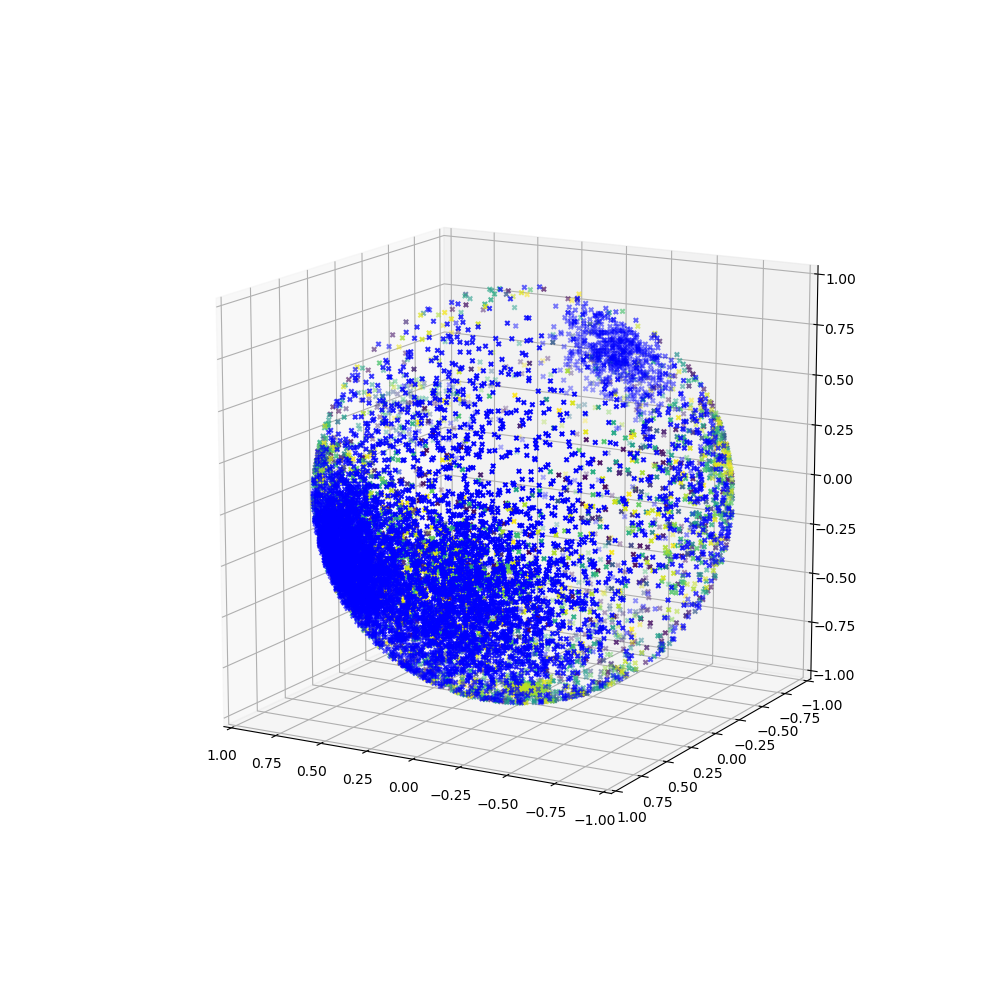

In [22]:
fig = pyplot.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1.,1.)
ax.set_ylim(-1.,1.)
ax.set_zlim(-1.,1.)
ax.scatter(*dir.T, c=np.linspace(0., 1., pos.shape[0]), marker='x', s= 10.)

vmfm_smpl = cd.mixture_learned.sample(6000)
ax.scatter(*vmfm_smpl.T, c='b', marker='x', s= 10.)

In [22]:
#xs, ws = _shuffle(dir, weight)
xs, ws = dir, weight

<IPython.core.display.Javascript object>


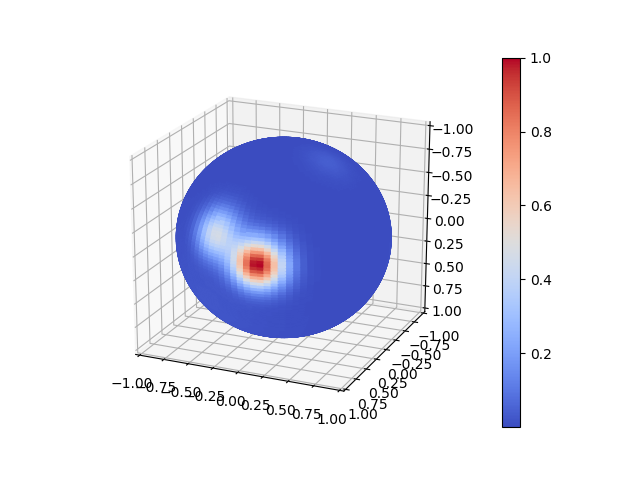

In [35]:
xs, ws = _shuffle(dir, weight)

prior_nu = 80
prior_alpha = 80
prior_tau = 80
maximization_step_every = 10 * prior_nu;
prior_mode = VMFMixture8()
incremental = VMFFitIncremental8(
    prior_nu = prior_nu, 
    prior_alpha = prior_alpha, 
    prior_tau = prior_tau,
    prior_mode = prior_mode,
    maximization_step_every = maximization_step_every)

vmfm = VMFMixture8()
incremental.fit(vmfm, xs, ws)

fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
v = plot_vmf_pdf(ax, vmfm, logscale=False)

ax.set_xlim(-1.,1.)
ax.set_ylim(-1.,1.)
ax.set_zlim(-1.,1.)

m = matplotlib.cm.ScalarMappable(cmap=matplotlib.cm.coolwarm)
m.set_array(v)
pyplot.colorbar(m)

pyplot.show()

<IPython.core.display.Javascript object>


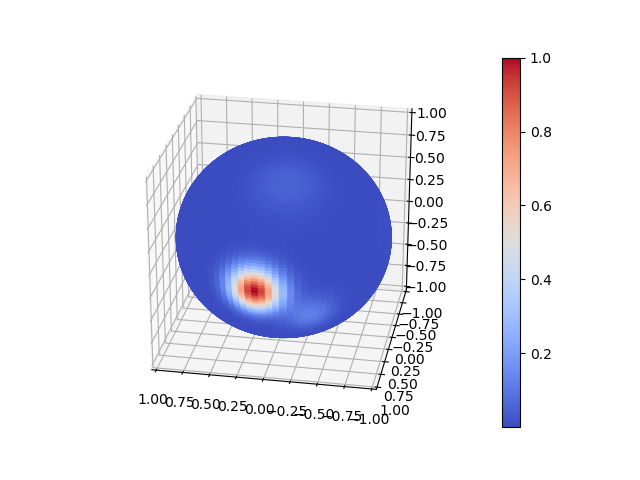

In [34]:
xs, ws = dir, weight

prior_nu = 80
prior_alpha = 80
prior_tau = 80
maximization_step_every = 10 * prior_nu;
prior_mode = VMFMixture8()
incremental = VMFFitIncremental8(
    prior_nu = prior_nu, 
    prior_alpha = prior_alpha, 
    prior_tau = prior_tau,
    prior_mode = prior_mode,
    maximization_step_every = maximization_step_every)

vmfm = VMFMixture8()
incremental.fit(vmfm, xs, ws)

fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
v = plot_vmf_pdf(ax, vmfm, logscale=False)

ax.set_xlim(-1.,1.)
ax.set_ylim(-1.,1.)
ax.set_zlim(-1.,1.)

m = matplotlib.cm.ScalarMappable(cmap=matplotlib.cm.coolwarm)
m.set_array(v)
pyplot.colorbar(m)
pyplot.show()

<IPython.core.display.Javascript object>


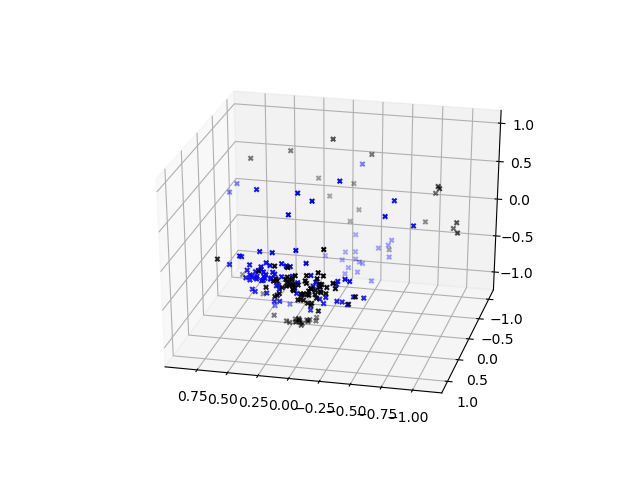

In [37]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ws = _shuffle(dir, weight)
ax.scatter(*(xs[:100]*1.1).T, c='k', marker='x', s= 10.)
vmfm_smpl = vmfm.sample(100)
ax.scatter(*vmfm_smpl.T, c='b', marker='x', s= 10.)

In [ ]:
def run_fit(cell):
    gmm = path_guiding.GMM2d()
    init_uniform_means_on_cicle = np.array([
        [-0.02081824, -0.00203204],
        [ 0.4037143 , -0.5633242 ],
        [-0.60468113,  0.32800356],
        [-0.12180968,  0.6798401 ],
        [ 0.6943762 , -0.03451705],
        [ 0.4580511 ,  0.52144015],
        [-0.63349193, -0.26706135],
        [-0.18766472, -0.66355205]
    ])
    sigma_inv = np.full(8, 10.)
    init_precisions = np.zeros((8,2,2), dtype=np.float32)
    init_precisions[:,0,0] = sigma_inv
    init_precisions[:,1,1] = sigma_inv
    init_weights = np.full(8, 1./8., dtype=np.float32)
    gmm.initialize(init_weights, init_uniform_means_on_cicle, init_precisions)
    prior_nu = 1.00001; prior_alpha = 2.01; prior_u = 1.e-5; max_iters = 10;
    
    xs = cell.proj
    ws = np.average(cell.vals,axis=1)
    gmm.fit(xs, ws, prior_nu, prior_alpha, prior_u, max_iters)
    return gmm

def incremental_fit(cell):
    gmm = path_guiding.GMM2d()
    init_uniform_means_on_cicle = np.array([
        [-0.02081824, -0.00203204],
        [ 0.4037143 , -0.5633242 ],
        [-0.60468113,  0.32800356],
        [-0.12180968,  0.6798401 ],
        [ 0.6943762 , -0.03451705],
        [ 0.4580511 ,  0.52144015],
        [-0.63349193, -0.26706135],
        [-0.18766472, -0.66355205]
    ])
    sigma_inv = np.full(8, 10.)
    init_precisions = np.zeros((8,2,2), dtype=np.float32)
    init_precisions[:,0,0] = sigma_inv
    init_precisions[:,1,1] = sigma_inv
    init_weights = np.full(8, 1./8., dtype=np.float32)
    gmm.initialize(init_weights, init_uniform_means_on_cicle, init_precisions)
    
    prior_nu = 100; prior_alpha = 2.1; prior_u = 10; maximization_step_every = 100;
    
    incremental = path_guiding.GMM2dFitIncremental(
        prior_nu = prior_nu, 
        prior_alpha = prior_alpha, 
        prior_u = prior_u, 
        maximization_step_every = maximization_step_every)
    
    xs = cell.proj
    ws = np.average(cell.vals,axis=1)
    incremental.fit(gmm, xs, ws)
    
    return gmm

In [ ]:
#PREFIX="D:\\tmp\\"
PREFIX="/tmp/"

In [ ]:
for i in range(11):
    tree, celldata = convert_data(read_records(PREFIX+f'radiance_records_{i}.json'), load_samples = False)
    weights = np.array([cd['average_weight'] for cd in celldata])
    print (f"{i}: {len(celldata)}, average weight = {np.average(weights)}")
    pyplot.bar(x = np.arange(len(weights)), height=weights)
    pyplot.show()

In [ ]:
#for i in range(14):
#    tree, celldata = convert_data(read_records(PREFIX+f'radiance_records_{i}.json'), load_samples = False)

In [ ]:
#%matplotlib notebook

In [ ]:
tree, celldata = convert_data(read_records(PREFIX+'radiance_records_14.json'), load_samples = False, build_boxes = True)

In [ ]:
n = [c.num_points for c in celldata]
#pyplot.plot(n)
sum(n)# / (1280*960)

In [ ]:
coords = np.concatenate([c.center[np.newaxis,:] for c in celldata], axis=0)
mask_roi = (coords[:,1] < 0.5) & (coords[:,1] > 0.0) & (coords[:,0] < 0.25) & (coords[:,0] > -0.25) & (coords[:,2] < 0.25) & (coords[:,2] > -0.25)
print (np.where(mask_roi))

In [ ]:
def plot_vmf_pdf(ax, vmfm):
    # https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/
    phi = np.linspace(0, np.pi, 100)
    theta = np.linspace(0, 2*np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)

    # The Cartesian coordinates of the unit sphere
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)

    pts = np.vstack((x.ravel(),y.ravel(),z.ravel())).T
    fcolors = vmfm.pdf(pts).reshape(x.shape)
    fcolors /= fcolors.max()
    
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=matplotlib.cm.jet(fcolors))

In [ ]:
%matplotlib notebook

In [ ]:
# For gaussian mixture
data_selection = [celldata[int(i)] for i in [73, 110, 164, 165]]
for cell1 in data_selection:
    if 0:
        fig, axes = pyplot.subplots(1,3, figsize=(15,5))
        fig.suptitle(f"#samples = {cell1.num_points}")
        if cell1.val is not None:
            w = np.average(cell1.val,axis=1) + 1.e-9
            norm = np.average(w)
            w /= norm
            axes[0].scatter(*cell1.proj.T, c = w, s=w, alpha = 0.2, edgecolor='none')
            axes[0].add_artist(pyplot.Circle((0, 0), 1, fill=False, color = 'k'))
        pdf_image(axes[1], cell1.mixture_learned)
        axes[1].set(title = 'learned')
        pdf_image(axes[2], cell1.mixture_sampled)
        axes[2].set(title = 'sampled')
        pyplot.show()
    if 1:
        fig = pyplot.figure()
        ax = fig.add_subplot(121, projection='3d')
        plot_vmf_pdf(ax, cell1.mixture_learned)
        fig = pyplot.figure()
        ax = fig.add_subplot(122, projection='3d')
        plot_vmf_pdf(ax, cell1.mixture_sampled)
        pyplot.show()